В книге Durbin et al стоит следующая задача: бросается кубик (значения 1-6), есть 2 типа кубиков: честный и нечестный. На картинке значения вероятности переходов состояний (матрицы переходов) и наблюдений (из матрицы эмиссий) 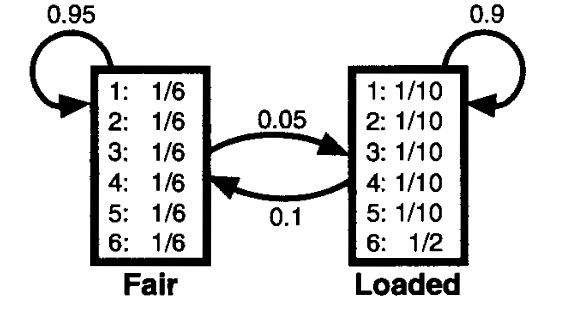

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Зададим матрицы переходов (N*N) и наблюдений (N*K), а также длину последовательности бросков (пока что 300, как в книге)
# N - число скрытых состояний, К - число возможных наблюдений
A = np.array([[0.95, 0.05], [0.1, 0.9]], float)
E = np.array([[1.0/6]*6, [0.1,0.1,0.1,0.1,0.1,0.5]], float)
L = 300

Для заданных матриц переходных вероятностей M и эмиссионных вероятностей E сгенерировать последовательность σ скрытых состояний и последовательность ε наблюдений длины L. В качестве начального распределения использовать стационарное распределение матрицы M (собственный вектор, соответсвтующий единичному собственному значению).


In [ ]:
#Поиск стационарного распределения, которое будет нашим начальным (собственный вектор с единичным собственным значением)
'''ненулевой вектор, который при умножении на некоторую квадратную матрицу
превращается в самого же себя с числовым коэффициентом, называется собственным вектором матрицы.
Число  называют собственным значением или собственным числом данной матрицы'''

def find_stationary_distribution(transition_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
    index_unit_eigval = np.argwhere(eigenvalues == 1)[0][0]
    stationary_vector = eigenvectors[:, index_unit_eigval]
    stationary_vector /= stationary_vector.sum() # нормировка, чтобы это было распределение вероятностей
    return stationary_vector

stat_dist = find_stationary_distribution(A)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([1.  , 0.85])

In [ ]:
np.random.seed(27)
def sequences_gen(L, A, E, stat_dist):

  def state_gen(probas):
    #генерация состояния
    #у нас 2 состояния: fair, loaded, можем использовать индексы 0, 1
    return np.random.choice(len(probas), p=probas)

  states = np.zeros(L, dtype=int)
  observations = np.zeros(L, dtype=int)

  states[0] = state_gen(stat_dist)

  # состояния
  for t in range(1, L):
    states[t] = state_gen(A[states[t-1]])

  # наблюдений
  for t in range(L):
    observations[t] = state_gen(E[states[t]])

  observations += 1

  return states, observations

states, observations = sequences_gen(L, A, E, stat_dist)
print(f'Последовательность состояний: \n {states}')
print(f'Последовательность наблюдений: \n {observations}')

Последовательность состояний: 
 [0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Последовательность наблюдений: 
 [4 5 5 2 1 5 2 6 6 6 2 2 1 2 6 6 6 6 6 1 1 6 5 1 1 1 2 3 5 6 4 6 4 6 5 6 6
 6 4 6 6 1 3 1 1 6 3 3 2 4 5 1 6 4 3 4 5 5 2 5 2 6 2 6 3 6 4 6 5 5 5 4 6 6
 6 6 1 1 1 2 5 5 6 5 4 6 1 6 6 3 6 3 3 2 5 5 6 6 5 5 6 1 6 6 4 6 4 1 4 4 2
 2 1 3 4 6 4 5 3 4 5 3 5 1 4 3 3 5 1 3 3 1 5 4 5 1 2 2 1 6 1 3 3 3 1 5 2 6
 1 6 2 1 1 6 6 1 1 6 2 3 

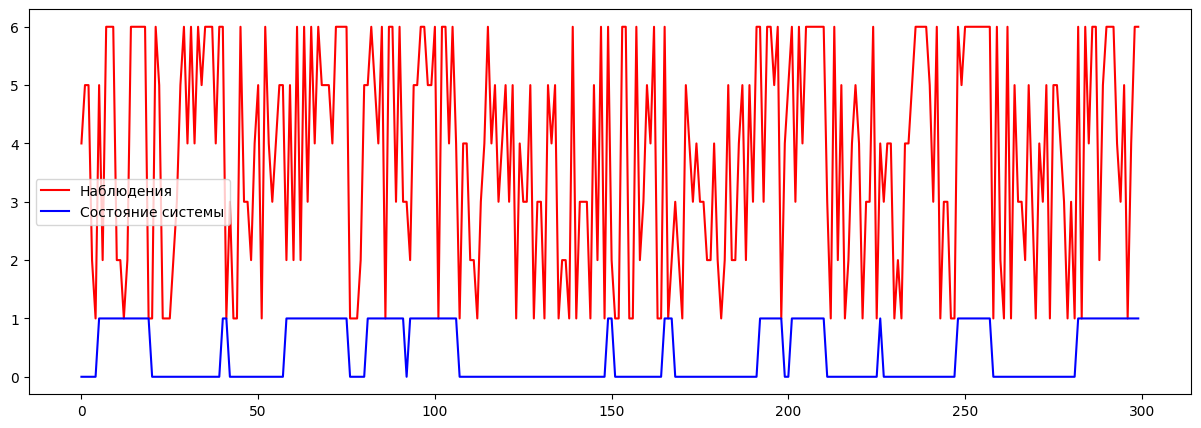

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))
axis = np.arange(L)
ax.plot(axis, observations, color = "Red", label = "Наблюдения")
ax.plot(axis, states, color = "Blue", label = "Состояние системы")
ax.legend()
plt.show()

Реализовать алгоритм Витерби: для данных M,E и ε

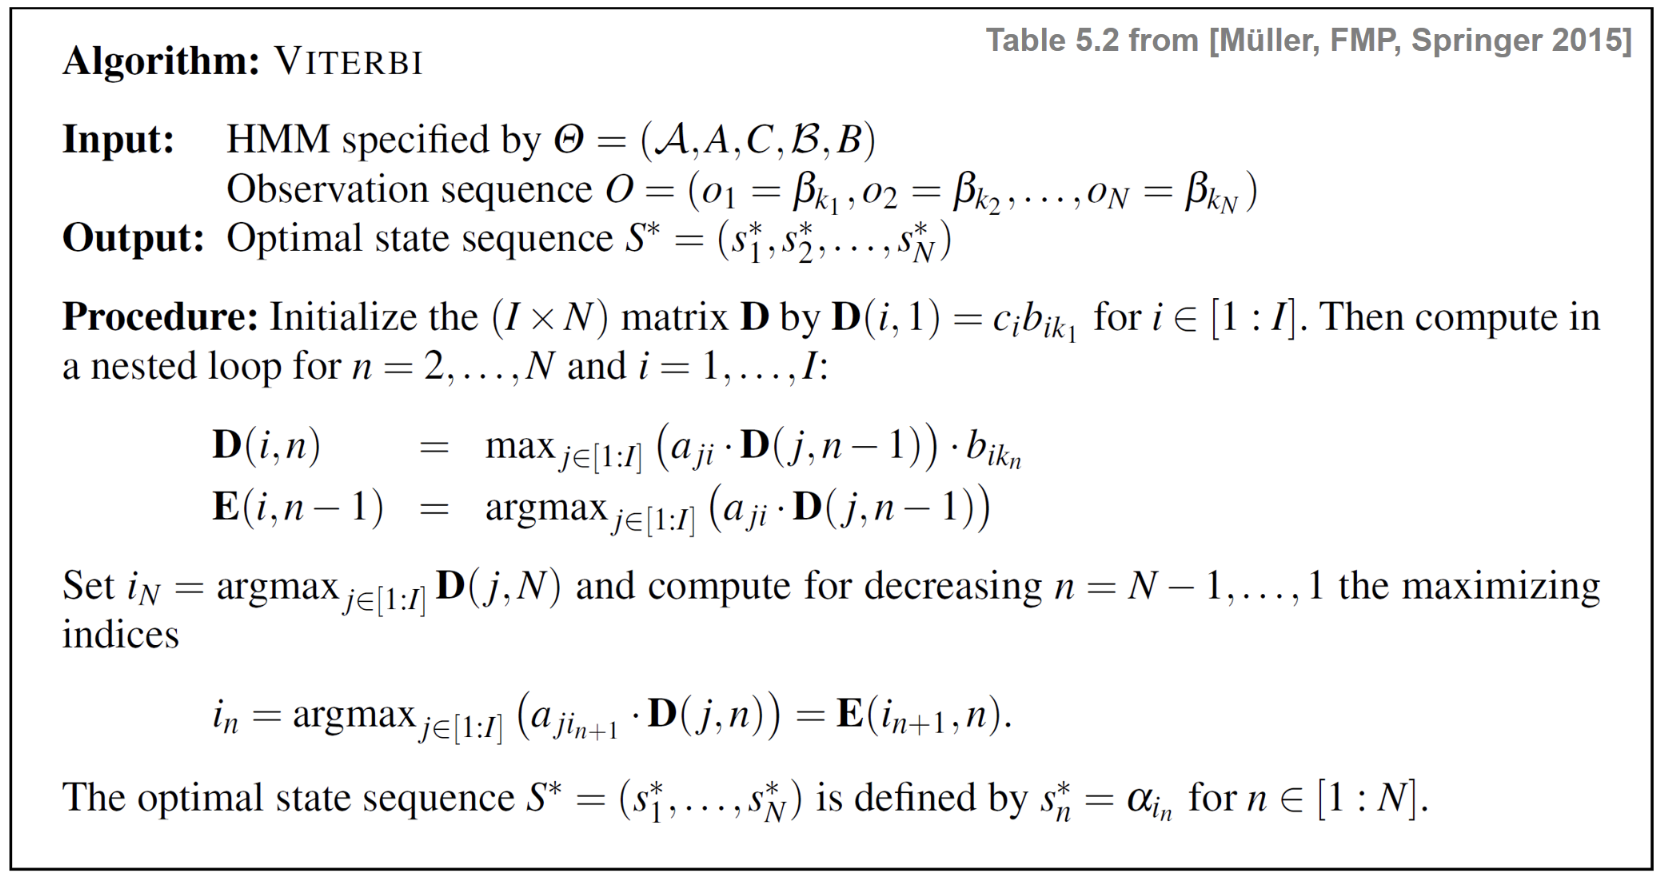

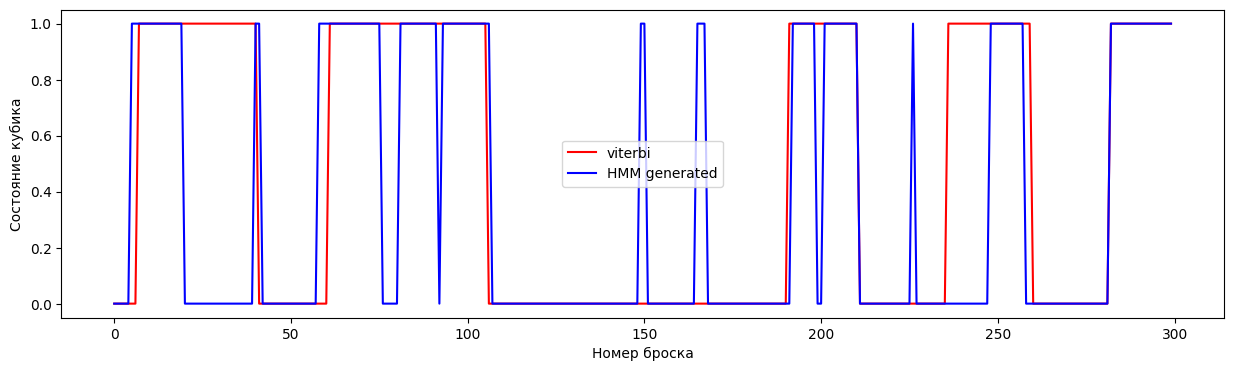

In [ ]:
def viterbi(obs, start_prob, trans_prob, emit_prob):
    num_states = trans_prob.shape[0]  # кол-во скрытых состояний
    num_obs = len(obs) # кол-во наблюдений
    obs = obs-1

    #Инициализация алгоритма (матрица витерби, в которую будем записывать вероятности, матрица обратного пути)
    V = np.zeros((num_states, num_obs))
    backtrace = np.zeros((num_states, num_obs), dtype=int)

        #Заполняю первый столбец матрицы Витерби, используя значения стационарного распрееления, p(o, s) = p(o|s)*p(s)
    for s in range(num_states):
        V[s, 0] = start_prob[s] * emit_prob[s][obs[0]]

    # Запоняю остаток матрицы, опираясь на предыдущие ячейки, p(o, s(i))=p(o|s(i))*p(s(i)|s(i-1))*p(s(i-1))
    # вероятность такого наблюдения при таком состоянии, вероятность перехода из предыдущго состояния, вероятность предыдущего состояния
    # Выбираю максимум
    # В матрице обратного пути записываю индекс максимума (p(s(i)|s(i-1))*p(s(i-1)))
    for n in range(1, num_obs):
        for i in range(num_states):
            tmp = np.multiply(trans_prob[:, i], V[:, n-1])
            V[i, n] = np.max(tmp) * emit_prob[i, obs[n]]
            backtrace[i, n-1] = np.argmax(tmp)


    # Записываю наиболее вероятное последнее состояние
    last_state = np.argmax(V[:, -1])

    # Иду назад по матрице индексов и записываю состояния в переменную path
    path = [last_state]
    for t in range(num_obs-1, 0, -1):
        last_state = backtrace[last_state, t-1]
        path.insert(0, last_state)

    return path

viterbi_states = viterbi(observations, stat_dist, A, E)
fig, ax = plt.subplots(figsize = (15, 4))
axis = np.arange(L)
ax.plot(axis, viterbi_states, color = "Red", label = "viterbi")
ax.plot(axis, states, color = "Blue", label = "HMM generated")
plt.xlabel('Номер броска')
plt.ylabel('Состояние кубика')
ax.legend()
plt.show()

Реализовать алгоритмы прямого и обратного хода (особое внимание уделите инициализации алгоритмов!). Вычислить P(ε) с помощью обоих алгоритмов.


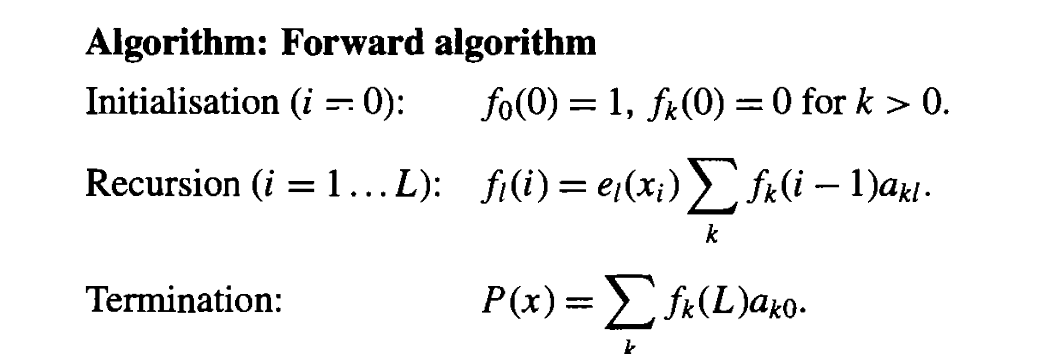

In [ ]:
def forward_algorithm(obs, start_prob, trans_prob, emit_prob):
    num_states = trans_prob.shape[0]  # кол-во скрытых состояний
    num_obs = len(obs) # кол-во наблюдений
    obs = obs-1
    forward = np.zeros((num_states, num_obs))

    '''forward[0, 0] = 1
    for i in range(1, num_states):
        forward[i, 0] = 0'''

    for s in range(num_states):
        forward[s, 0] = start_prob[s] * emit_prob[s][obs[0]]


    for n in range(1, num_obs):
        for i in range(num_states):
            #forward[i, n] = np.sum(forward[:, n-1] * trans_prob[:, i] * emit_prob[i, obs[n]])
            forward[i, n] = emit_prob[i, obs[n]] * np.sum(forward[:, n-1] * trans_prob[:, i])

    probability = np.sum(forward[:, -1])

    return forward, probability

f_mat, f_proba = forward_algorithm(observations, stat_dist, A, E)
print(f_proba)

1.7748064783723633e-224


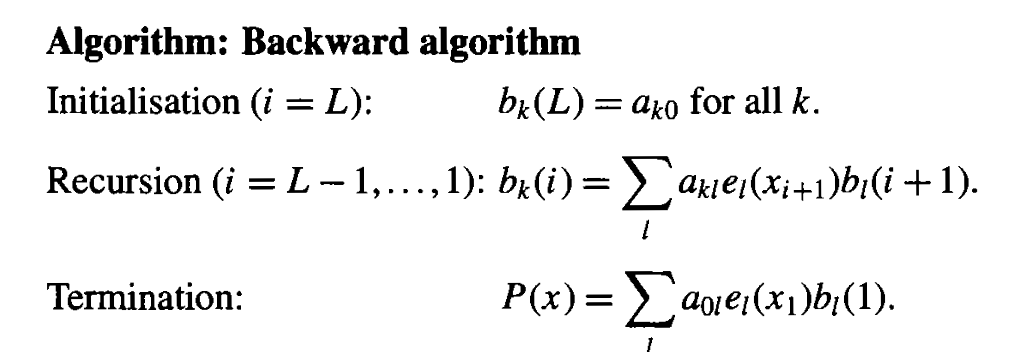

In [ ]:
def backward_algorithm(obs, start_prob, trans_prob, emit_prob):
    num_states = trans_prob.shape[0]  # кол-во скрытых состояний
    num_obs = len(obs) # кол-во наблюдений
    obs = obs-1
    backward = np.zeros((num_states, num_obs))

    '''for s in range(num_states):
        backward[s, -1] = trans_prob[s, 0]'''

    backward[:, -1] = trans_prob.sum(axis = 1)

    for n in range(num_obs-2, -1, -1):
        for i in range(num_states):
            backward[i, n] = np.sum(backward[:, n+1] * trans_prob[i, :] * emit_prob[:, obs[n+1]])

    #probability = np.sum(backward[:, 0] * emit_prob[:, obs[0]] * trans_prob[0, :])
    probability = np.sum(backward[:, 0] * emit_prob[:, obs[0]] * start_prob)

    return backward, probability

b_mat, b_proba = backward_algorithm(observations, stat_dist, A, E)
print(b_proba)

1.774806478372359e-224


Апостериорное декодирование 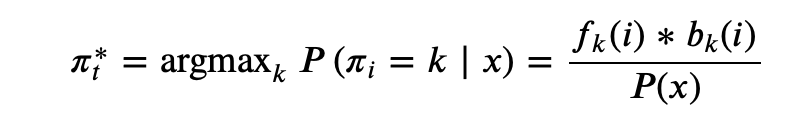

In [ ]:
post_prob=(np.multiply(f_mat, b_mat) / f_proba)
post_prob

array([[0.89599669, 0.90974338, 0.90769173, 0.88911721, 0.84746048,
        0.768011  , 0.62271218, 0.36025361, 0.27830086, 0.27650199,
        0.35265426, 0.37525122, 0.3522727 , 0.27560412, 0.11817097,
        0.06597457, 0.05509991, 0.07223089, 0.13834456, 0.33439773,
        0.43496739, 0.47556842, 0.64769327, 0.73938998, 0.78304008,
        0.79405804, 0.77633472, 0.72361135, 0.61726934, 0.41975537,
        0.36644963, 0.24609522, 0.2204711 , 0.1418382 , 0.12823147,
        0.07048736, 0.05744067, 0.0731156 , 0.13670624, 0.15416352,
        0.24262809, 0.51042566, 0.6563979 , 0.73209303, 0.76424182,
        0.76419722, 0.85360221, 0.90221931, 0.92721705, 0.93742304,
        0.9364414 , 0.92392549, 0.89545546, 0.92775657, 0.9437351 ,
        0.94903367, 0.94552339, 0.93196466, 0.90356939, 0.85031014,
        0.7533791 , 0.5785463 , 0.53803786, 0.4403387 , 0.43758684,
        0.38730542, 0.41686145, 0.40088125, 0.46860641, 0.48581863,
        0.45859618, 0.3773258 , 0.21330789, 0.16

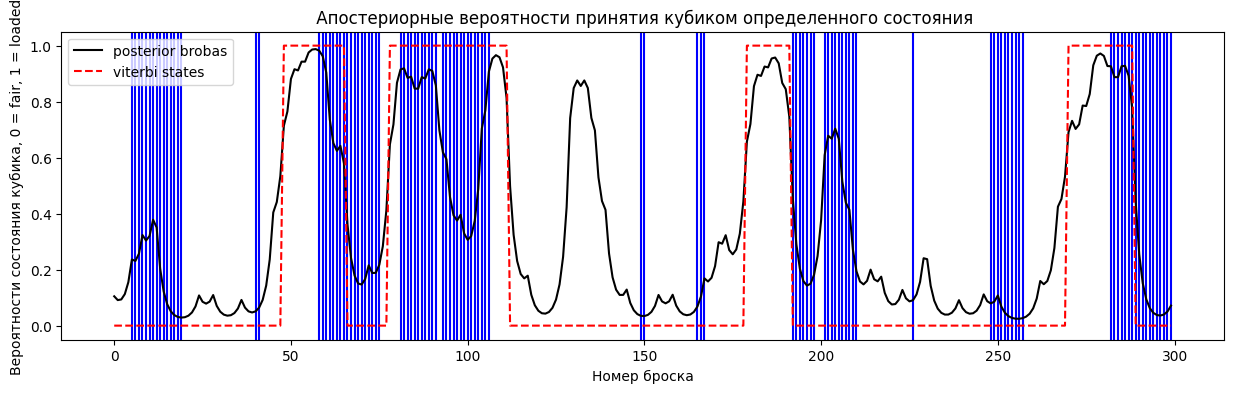

In [ ]:
def plot(L, states, post_prob, viterbi_states):
    plt.figure(figsize=(15,4))
    axis = np.arange(L)
    plt.xlabel('Номер броска')
    plt.ylabel('Вероятности состояния кубика, 0 = fair, 1 = loaded')
    for i in range(L):
        if states[i] == 0:
            plt.axvline(x = i, color ='white')
        else:
            plt.axvline(x = i, color = 'blue')
    plt.title(' Aпостериорныe вероятности принятия кубиком определенного состояния')
    plt.plot(axis, post_prob[1, :], color = 'black', label = 'posterior brobas')
    plt.plot(axis, viterbi_states, color = 'red', linestyle = '--', label = 'viterbi states')
    plt.legend()

plot(L, states, post_prob, viterbi_states)

Защита от потери точности Витерби - считаем вероятности в логарифмическом пространстве

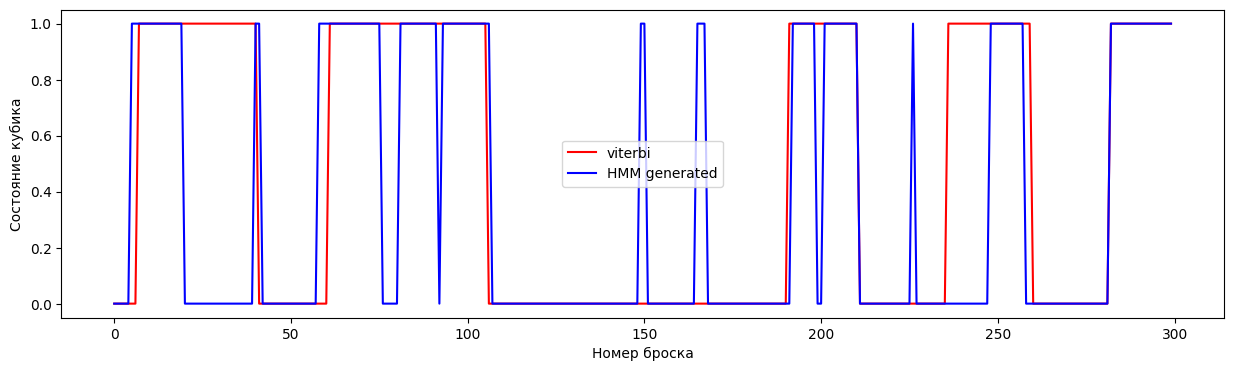

In [ ]:
def log_viterbi(obs, start_prob, trans_prob, emit_prob):
    num_states = trans_prob.shape[0]  # кол-во скрытых состояний
    num_obs = len(obs) # кол-во наблюдений
    obs = obs-1

    #Инициализация алгоритма (матрица витерби, в которую будем записывать вероятности, матрица обратного пути)
    V = np.zeros((num_states, num_obs))
    backtrace = np.zeros((num_states, num_obs), dtype=int)

    # Заполняю первый столбец матрицы Витерби, используя значения стационарного распрееления, log(p(o, s)) = log(p(o|s)) + log(p(s))
    V[:, 0] = np.log(start_prob) + np.log(emit_prob[:, obs[0]])

    # Запоняю остаток матрицы
    for n in range(1, num_obs):
        for i in range(num_states):
            tmp = V[:, n-1] + np.log(trans_prob[:, i])
            V[i, n] = np.max(tmp  + np.log(emit_prob[i, obs[n]]))
            backtrace[i, n-1] = np.argmax(tmp)

    # Записываю наиболее вероятное последнее состояние
    last_state = np.argmax(V[:, -1])

    # Иду назад по матрице индексов и записываю состояния в переменную path
    path = [last_state]
    for t in range(num_obs - 1, 0, -1):
        last_state = backtrace[last_state, t-1]
        path.insert(0, last_state)

    return path

log_viterbi_states = log_viterbi(observations, stat_dist, A, E)
fig, ax = plt.subplots(figsize = (15, 4))
axis = np.arange(L)
ax.plot(axis, log_viterbi_states, color = "Red", label = "viterbi")
ax.plot(axis, states, color = "Blue", label = "HMM generated")
plt.xlabel('Номер броска')
plt.ylabel('Состояние кубика')
ax.legend()
plt.show()

Защита от потери точности алгоритмов прямого и обратного прохода - считаем вероятности в логарифмическом пространстве, где надо(в сложениях) - берем экспоненту

In [ ]:
from scipy.special import logsumexp

def log_forward_algorithm(obs, start_prob, trans_prob, emit_prob):
    num_states = trans_prob.shape[0]  # кол-во скрытых состояний
    num_obs = len(obs) # кол-во наблюдений
    obs = obs-1
    forward = np.zeros((num_states, num_obs))

    forward[:, 0] = np.log(start_prob) + np.log(emit_prob[:, obs[0]])

    for n in range(1, num_obs):
        for i in range(num_states):
            forward[i, n] = np.log(emit_prob[i, obs[n]]) + logsumexp(forward[:, n-1] + np.log(trans_prob[:, i]))

    log_probability = logsumexp(forward[:, -1])

    return forward, log_probability

f_mat_log, f_proba_log = log_forward_algorithm(observations, stat_dist, A, E)
print(f_proba_log)

-515.2053694399524


In [ ]:
def log_backward_algorithm(obs, start_prob, trans_prob, emit_prob):
    num_states = trans_prob.shape[0]  # кол-во скрытых состояний
    num_obs = len(obs) # кол-во наблюдений
    obs = obs-1
    backward = np.zeros((num_states, num_obs))

    backward[:, -1] = np.log(trans_prob.sum(axis=1))

    for n in range(num_obs - 2, -1, -1):
        for i in range(num_states):
            backward[i, n] = logsumexp(backward[:, n+1] + np.log(trans_prob[i, :]) + np.log(emit_prob[:, obs[n+1]]))

    log_probability = logsumexp(backward[:, 0] + np.log(emit_prob[:, obs[0]]) + np.log(start_prob))

    return backward, log_probability

b_mat_log, b_proba_log = log_backward_algorithm(observations, stat_dist, A, E)
print(b_proba_log)

-515.2053694399528


In [ ]:
#Апостериорное декодирование лог-трансформированных матриц
post_prob_log=((f_mat_log + b_mat_log) / f_proba_log)
post_prob_log

array([[1.00021315, 1.0001836 , 1.00018798, 1.00022812, 1.00032125,
        1.00051232, 1.00091938, 1.00198163, 1.00248261, 1.00249519,
        1.00202301, 1.00190246, 1.00202511, 1.00250151, 1.00414519,
        1.00527651, 1.00562612, 1.00510066, 1.00383926, 1.00212619,
        1.00161583, 1.00144262, 1.00084304, 1.00058604, 1.00047471,
        1.00044759, 1.0004914 , 1.00062791, 1.00093642, 1.00168493,
        1.00194853, 1.00272132, 1.00293473, 1.00379085, 1.0039866 ,
        1.00514809, 1.00554537, 1.00507703, 1.00386238, 1.00362912,
        1.00274886, 1.00130532, 1.00081713, 1.00060529, 1.00052187,
        1.00052198, 1.00030724, 1.00019972, 1.00014667, 1.00012543,
        1.00012746, 1.00015358, 1.00021433, 1.00014555, 1.0001124 ,
        1.00010153, 1.00010873, 1.00013676, 1.00019682, 1.00031474,
        1.00054966, 1.00106217, 1.00120307, 1.00159201, 1.00160418,
        1.00184109, 1.00169835, 1.00177422, 1.00147124, 1.00140123,
        1.00151315, 1.00189176, 1.00299884, 1.00

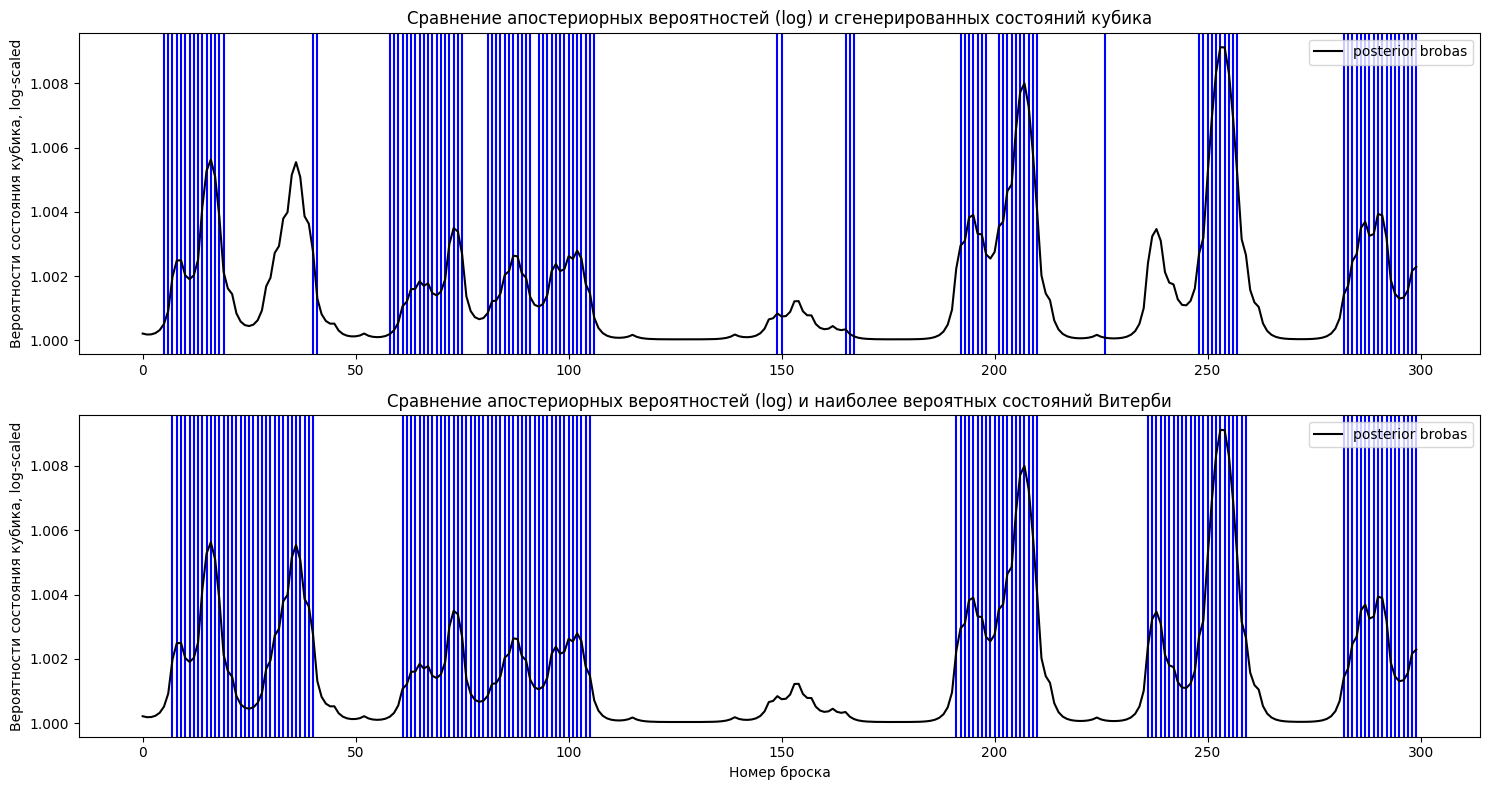

In [ ]:
def log_plot(L, states, post_prob_log, log_viterbi_states):
    fig, axs = plt.subplots(2, 1, figsize=(15, 8))
    plt.subplot(2, 1, 1)
    axis = np.arange(L)
    plt.ylabel('Вероятности состояния кубика, log-scaled')
    for i in range(L):
        if states[i] == 0:
            plt.axvline(x=i, color='white')
        else:
            plt.axvline(x=i, color='blue')
    plt.title('Сравнение апостериорных вероятностей (log) и сгенерированных состояний кубика')
    plt.plot(axis, post_prob_log[0, :], color='black', label='posterior brobas')
    plt.legend()

    plt.subplot(2, 1, 2)
    axis = np.arange(L)
    plt.xlabel('Номер броска')
    plt.ylabel('Вероятности состояния кубика, log-scaled')
    for i in range(L):
        if log_viterbi_states[i] == 0:
            plt.axvline(x=i, color='white')
        else:
            plt.axvline(x=i, color='blue')
    plt.title('Сравнение апостериорных вероятностей (log) и наиболее вероятных состояний Витерби')
    plt.plot(axis, post_prob_log[0, :], color='black', label='posterior brobas')
    plt.legend()

    plt.tight_layout()
    plt.show()

log_plot(L, states, post_prob_log, log_viterbi_states)

Протестировать для длин 100, 500, 1000

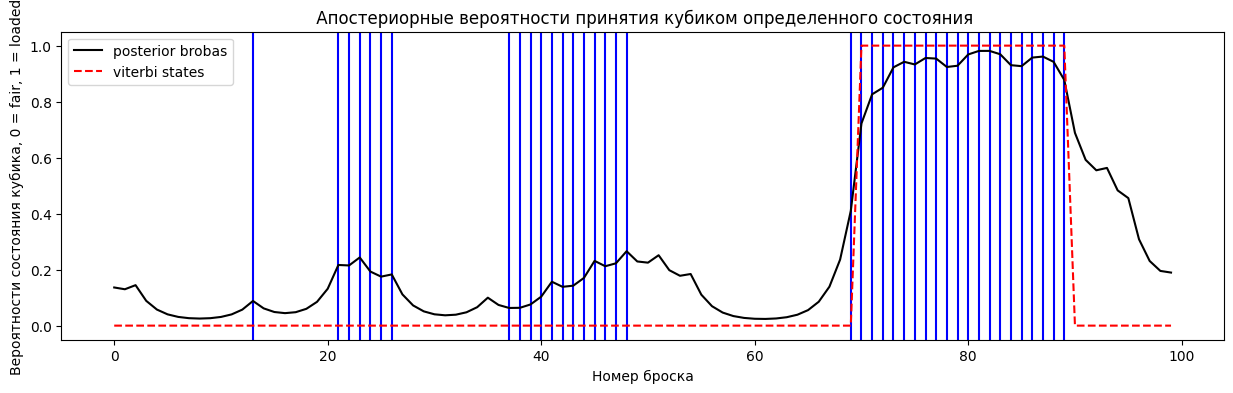

In [ ]:
L = 100
states, observations = sequences_gen(L, A, E, stat_dist)
viterbi_states = viterbi(observations, stat_dist, A, E)
f_mat, f_proba = forward_algorithm(observations, stat_dist, A, E)
b_mat, b_proba = backward_algorithm(observations, stat_dist, A, E)
post_prob = (np.multiply(f_mat, b_mat) / f_proba)
plot(L, states, post_prob, viterbi_states)

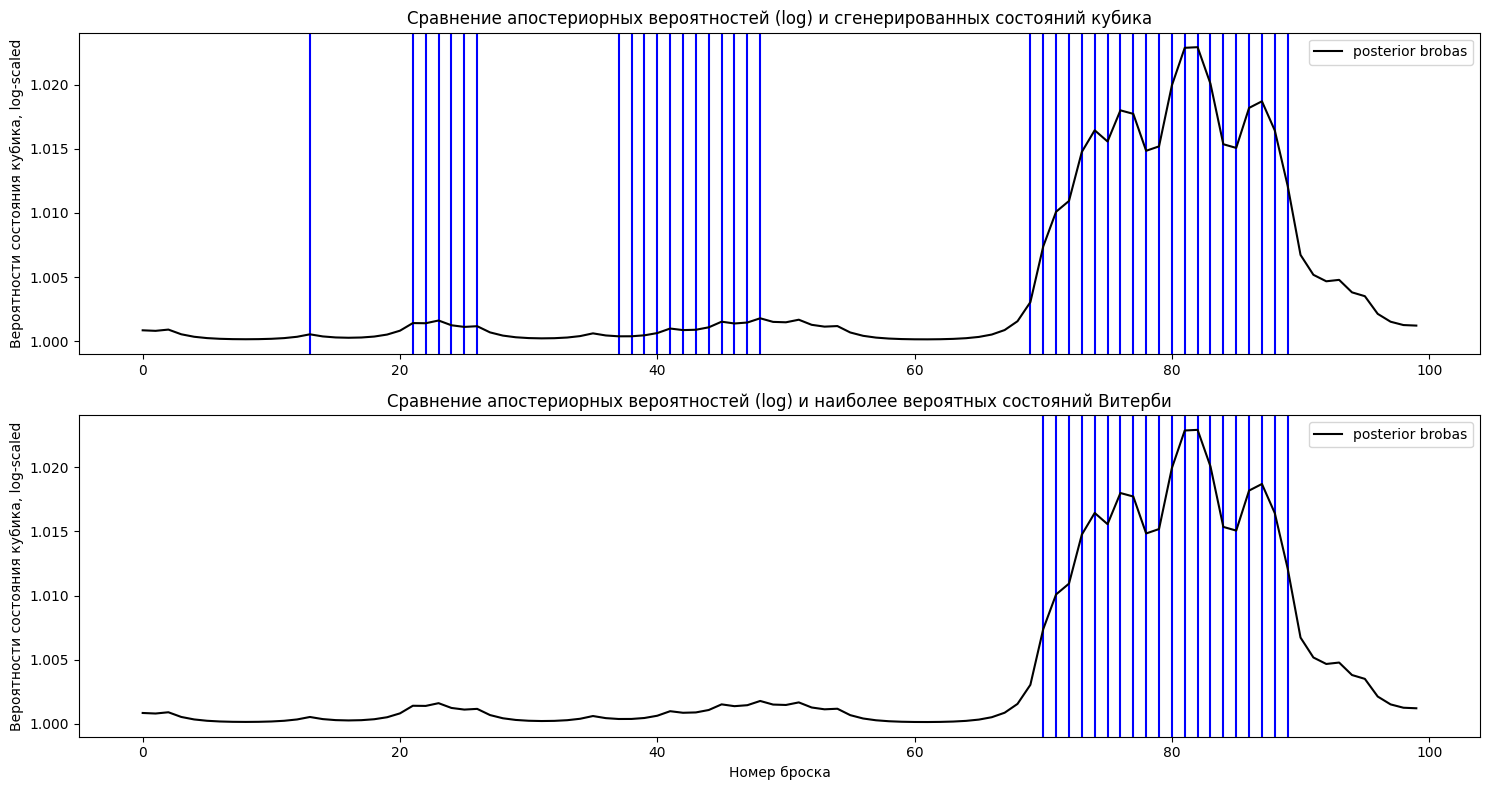

In [ ]:
log_viterbi_states = log_viterbi(observations, stat_dist, A, E)
f_mat_log, f_proba_log = log_forward_algorithm(observations, stat_dist, A, E)
b_mat_log, b_proba_log = log_backward_algorithm(observations, stat_dist, A, E)
post_prob_log=((f_mat_log + b_mat_log) / f_proba_log)
log_plot(L, states, post_prob_log, log_viterbi_states)

<ipython-input-108-c549ed71fb30>:6: RuntimeWarning: invalid value encountered in divide
  post_prob = (np.multiply(f_mat, b_mat) / f_proba)


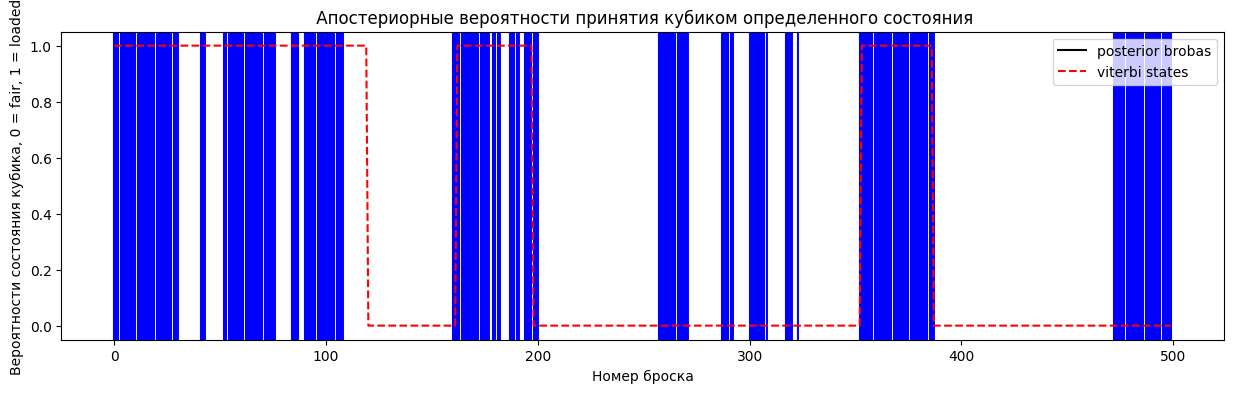

In [ ]:
L = 500
states, observations = sequences_gen(L, A, E, stat_dist)
viterbi_states = viterbi(observations, stat_dist, A, E)
f_mat, f_proba = forward_algorithm(observations, stat_dist, A, E)
b_mat, b_proba = backward_algorithm(observations, stat_dist, A, E)
post_prob = (np.multiply(f_mat, b_mat) / f_proba)
plot(L, states, post_prob, viterbi_states)

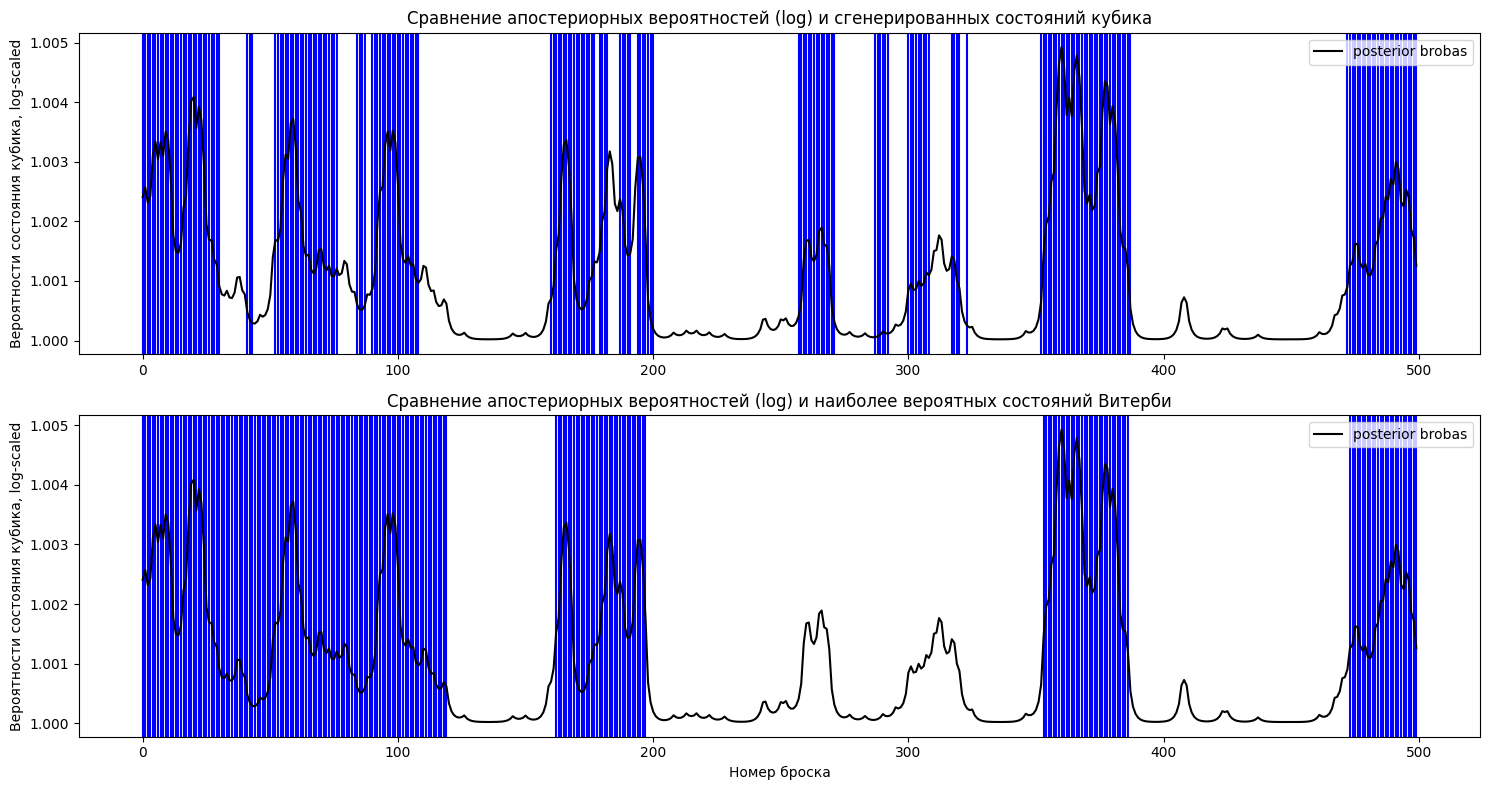

In [ ]:
log_viterbi_states = log_viterbi(observations, stat_dist, A, E)
f_mat_log, f_proba_log = log_forward_algorithm(observations, stat_dist, A, E)
b_mat_log, b_proba_log = log_backward_algorithm(observations, stat_dist, A, E)
post_prob_log=((f_mat_log + b_mat_log) / f_proba_log)
log_plot(L, states, post_prob_log, log_viterbi_states)

<ipython-input-110-176e203e7c0a>:6: RuntimeWarning: invalid value encountered in divide
  post_prob = (np.multiply(f_mat, b_mat) / f_proba)


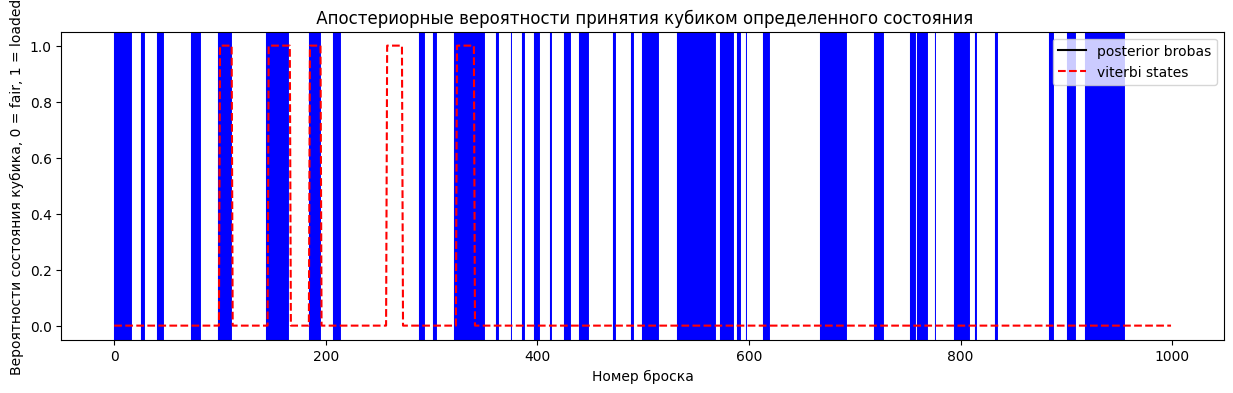

In [ ]:
L = 1000
states, observations = sequences_gen(L, A, E, stat_dist)
viterbi_states = viterbi(observations, stat_dist, A, E)
f_mat, f_proba = forward_algorithm(observations, stat_dist, A, E)
b_mat, b_proba = backward_algorithm(observations, stat_dist, A, E)
post_prob = (np.multiply(f_mat, b_mat) / f_proba)
plot(L, states, post_prob, viterbi_states)

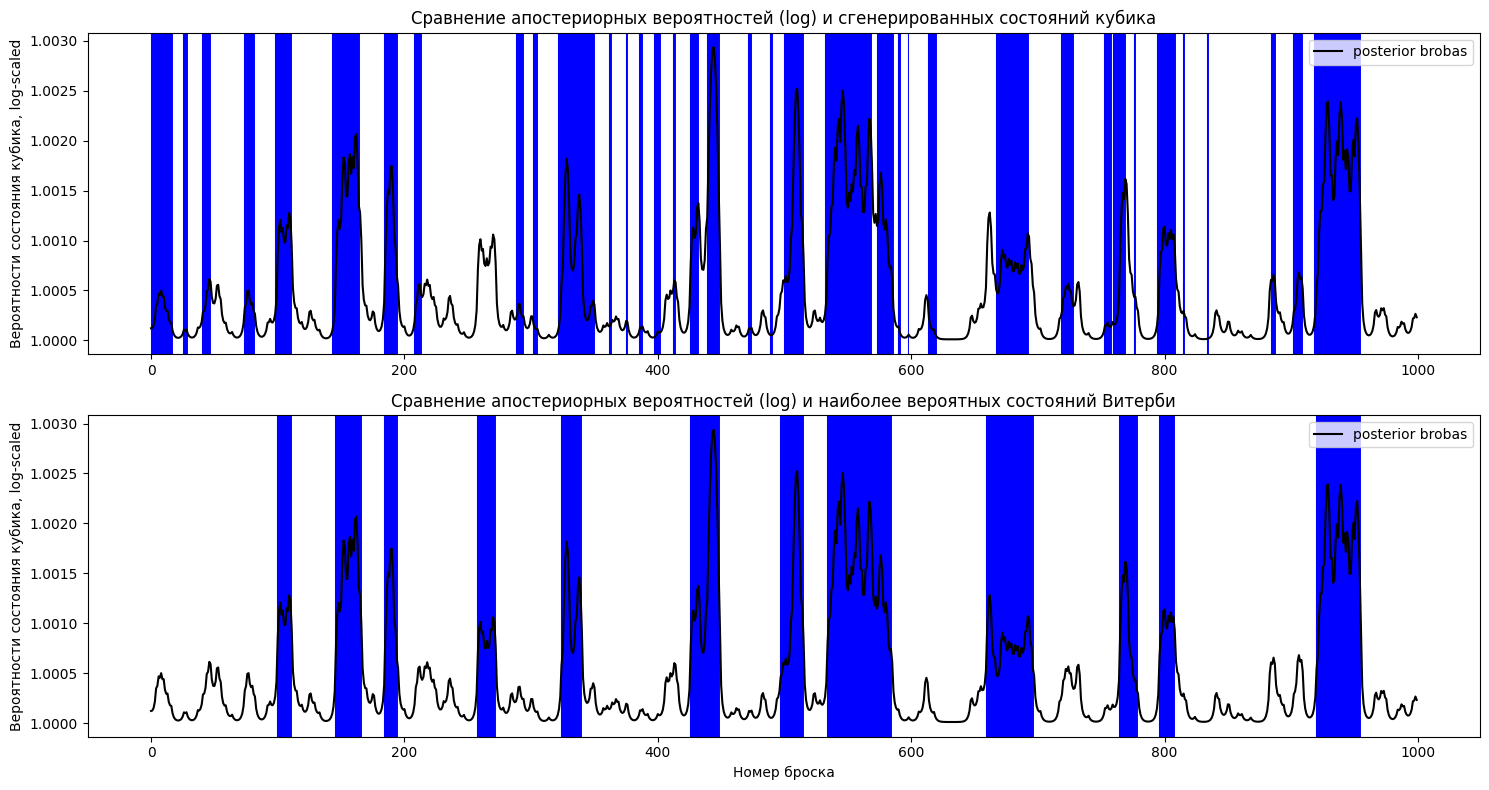

In [ ]:
log_viterbi_states = log_viterbi(observations, stat_dist, A, E)
f_mat_log, f_proba_log = log_forward_algorithm(observations, stat_dist, A, E)
b_mat_log, b_proba_log = log_backward_algorithm(observations, stat_dist, A, E)
post_prob_log=((f_mat_log + b_mat_log) / f_proba_log)
log_plot(L, states, post_prob_log, log_viterbi_states)

Уже на 500 защита от потери точности необходима

Проверим на последовательности из книги

In [ ]:
casino_obs_txt = '315116246446644245311321631164152133625144543631656626566666651166453132651245636664631636663162326455236266666625151631222555441666566563564324364131513465146353411126414626253356366163666466232534413661661163252562462255265252266435353336233121625364414432335163243633665562466662632666612355245242'
casino_states_txt = 'FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLFFFFFFFFFFFFLLLLLLLLLLLLLLLLFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFLLLLLLLLLLLLLLLLLLLLLLFFFFFFFFFFF'
casino_obs_arr = np.array([int(char) for char in casino_obs_txt])
casino_states_arr = np.array([0 if char == 'F' else 1 for char in casino_states_txt])
L = casino_states_arr.shape[0]

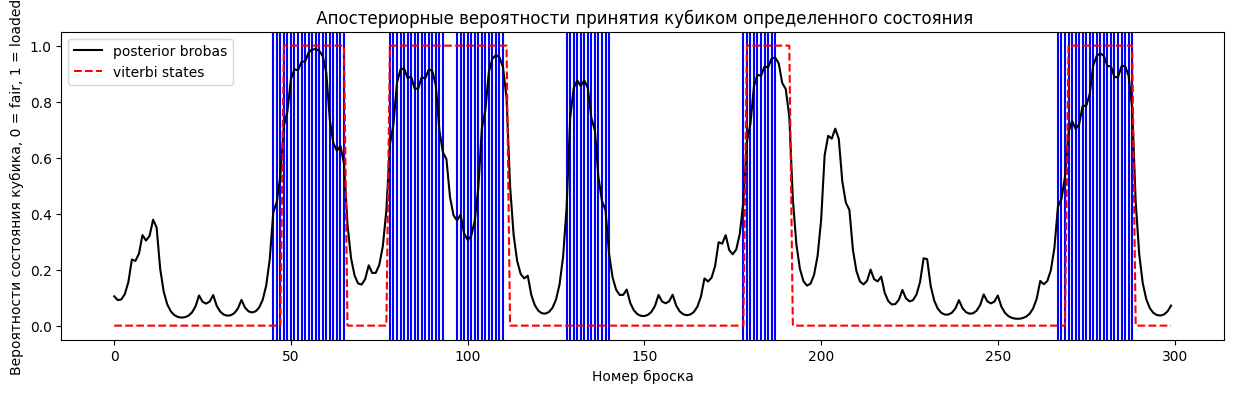

In [ ]:
viterbi_states = viterbi(casino_obs_arr, stat_dist, A, E)
f_mat, f_proba = forward_algorithm(casino_obs_arr, stat_dist, A, E)
b_mat, b_proba = backward_algorithm(casino_obs_arr, stat_dist, A, E)
post_prob = (np.multiply(f_mat, b_mat) / f_proba)
plot(L, casino_states_arr, post_prob, viterbi_states)

In [ ]:
f_proba

3.8266688037010765e-225

In [ ]:
f_mat

array([[1.11111111e-001, 1.81481481e-002, 2.93271605e-003,
        4.71192387e-004, 7.54659654e-005, 1.20654893e-005,
        1.99433341e-006, 3.24331700e-007, 5.22893155e-008,
        8.83583818e-009, 1.45346784e-009, 2.35770140e-010,
        4.04728631e-011, 7.92060679e-012, 1.39358513e-012,
        2.33865043e-013, 3.83340298e-014, 6.20652929e-015,
        9.98222685e-016, 1.59966135e-016, 2.55834355e-017,
        4.08703291e-018, 6.52514502e-019, 1.04141468e-019,
        1.66178426e-020, 2.73250021e-021, 4.43151448e-022,
        7.13388567e-023, 1.14378372e-023, 1.90484864e-024,
        3.11001384e-025, 5.02466546e-026, 8.07206629e-027,
        1.29273552e-027, 2.06675049e-028, 3.30105506e-029,
        5.26972353e-030, 8.67501150e-031, 1.40775036e-031,
        2.26695342e-032, 3.63528799e-033, 5.81611450e-034,
        9.29335968e-035, 1.48390143e-035, 2.36846261e-036,
        3.77948844e-037, 6.21527788e-038, 1.00803315e-038,
        1.62278461e-039, 2.73170494e-040, 4.48478906e-04

In [ ]:
b_proba

3.826668803701078e-225